# Acercamiento al Modelo de Propagación del COVID-19

## Introducción

Como todos sabemos, el modelamiento matemático sirve fundamentalmente para entender fenómenos que se presentan en la realidad. Su labor principal es la **predicción del futuro**.

En momentos como este, cuando el COVID-19 es una epidemia a nivel mundial, se hace necesario tratar de entender a fondo los modelos detrás de los datos para poder tomar decisiones para nuestra prevención y poder cambiar el futuro que en principio, no se ve promisorio.

Además, entender un fenómeno nos da tranquilidad, pues sabemos qué esperar y qué no esperar. Nos saca de la ignorancia de la desinformación y nos ayuda a divulgar la verdad. Quizá esto calme un poco el pánico en una audencia educativa.

Es mi deber como Matemático Aplicado el tratar de entender esta epidemia para poder dar pautas y divulgar qué podemos esperar, qué podemos entender y qué podemos proponer para lograr calma, visión y actuar rápidamente frente a un virus que no mide color de piel, partidos políticos, religión ni ideologías personales.

## Modelo Matemático

El modelo matemático asociado a epidemias, se remonta al año 1927, "*tras la publicación del primer artículo sobre el tema, de autoría de los investigadores escoceses W. O. Kermack y A. G. McKendrick, quienes comprobaron sus resultados al aplicarlo para estudiar el comportamiento poblacional en una epidemia ocurrida en la ciudad de Bombay en 1905*" (Fuente en [1](https://blogs.elespectador.com/actualidad/ecuaciones-de-opinion/las-matematicas-del-coronavirus))

Supongamos (Hipótesis) que tenemos tres tipos de población que van cambiando de características en el tiempo:

- Susceptibles: $S(t)$
- Infectados:   $I(t)$
- Recuperados:    $R(t)$

**Suceptibles:** Individuos sin inmunidad al agente infeccioso, y que por tanto, puede ser infectado si es expuesto.

**Infectados:** Persona con el agente y que pueden potencialmente trasmitir la infección a la población suceptible.

**Recuperados:** Individuos inmunes ya sea porque se han curado o porque han muerto. A veces se refiere como la población removida.

La **población total es entonces, en cualquier momento,**

$$N= S+I+R$$

Razón por la cual a este modelo se le llama **Modelo SIR**.

## Ecuaciones del Modelo

Las ecuaciones que rigen el comportamiento de cada uno de estos agentes se describe como:


\begin{equation} \label{eq1}
\begin{split}
\frac{dS}{dt} & = -\beta SI \\
\frac{dI}{dt}& = \beta SI -\gamma I \\
\frac{dR}{dt}& =  \gamma I \\
\end{split}
\end{equation}

Donde $\beta$ representa la tasa de transmisión y $\gamma$ es la tasa de recuperación.

Indaguemos: ¿Qué significa el término $SI$?

**Respuesta:** Las interacciones entre los suceptibles y los infectados, que resulta en más infectados y menos suceptibles.

Este modelo se parece ne gran medida a las ecuaciones de **depredador presa** o **Lotka-Volterra**.

Ya que tenemos las herramientas adecuadas para trabajar (Sistemas de Ecuaciones), resolvamos éste sistema no-lineal usando Python :)

50000


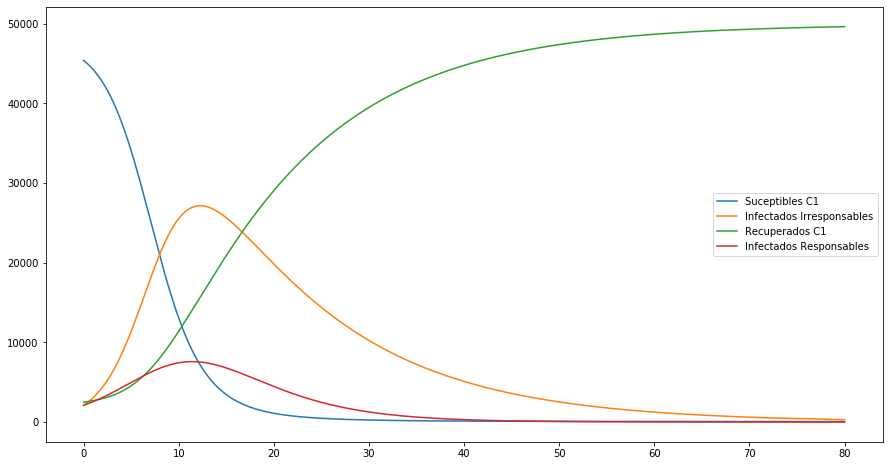

In [1]:
from P3Solver_EDOS import *
import matplotlib.pyplot as plt

##P EXP## DATOS
β=0.00001 # Tasa de trans.
γ=1/14 # tasa de rec


#### ESPERANZA ###
β1=0.00001 # trans. de trans.
γ1=1/4     # tasa de recup.

##HP##

f1=lambda t,S,I,R: -β*S*I
f2=lambda t,S,I,R:  β*S*I- γ*I
f3=lambda t,S,I,R:  γ*I

f4=lambda t,S,I,R: -β1*S*I
f5=lambda t,S,I,R:  β1*S*I- γ1*I
f6=lambda t,S,I,R:  γ1*I

# Millones
S0=45400
I0=2100
R0=2500

# Pob Total
N = S0+I0+R0
print(N)
# Tiempo
T=[0,80]

### NP ####
n=10000

###Numerical Solution###
t,S,I,R   =EulerM(f1,f2,f3,S0,I0,R0,T,n)
## Campaña politica exitosa
t,S1,I1,R1=EulerM(f4,f5,f6,S0,I0,R0,T,n)

# Felicidad Plots

plt.figure(figsize=(15,8))
plt.subplot(111)
plt.plot(t,S,label='Suceptibles C1')
plt.plot(t,I,label='Infectados Irresponsables')
plt.plot(t,R,label='Recuperados C1')
plt.plot(t,I1,label='Infectados Responsables')

plt.legend()
plt.show()


## Datos reales

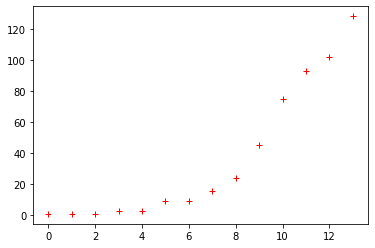

In [2]:
#Datos Reales, dia 14 desde el primer reporte

dias=14
t=np.arange(dias)
I=[1,1,1,3,3,9,9,16,24,45,75,93,102,128]
plt.plot(t,I,'r+')
plt.show()